In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
import Package18155_18316
from Package18155_18316 import LeadLag_RT
from Package18155_18316 import PID_RT

from importlib import reload
Package18155_18316 = reload(Package18155_18316)

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode


In [31]:
help(LeadLag_RT)

Help on function LeadLag_RT in module Package18155_18316:

LeadLag_RT(MV, Kp, Tlead, Tlag, Ts, PV, PVinit=0, method='EBD')
    The function "LeadLag_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :Tlead: lead time constant [s]
    :Tlag: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "LeadLag_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0.0, 100.0)

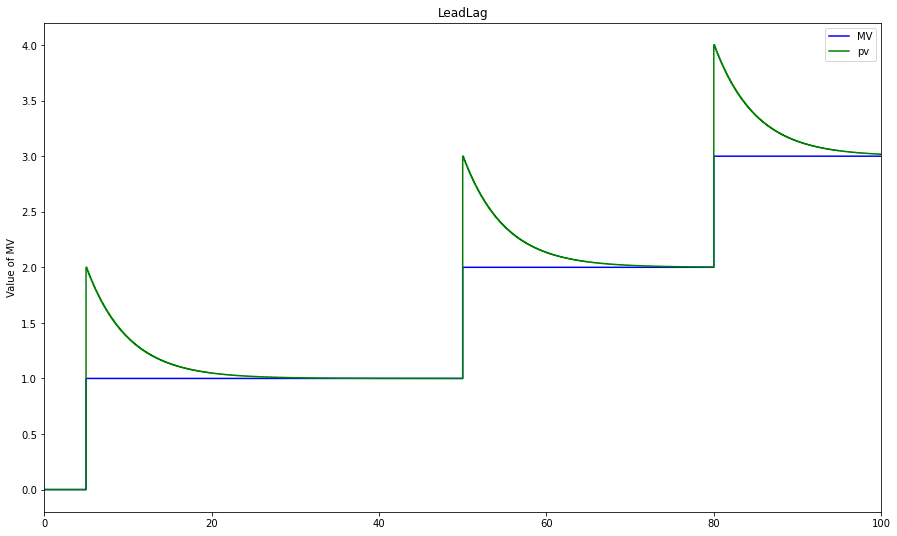

In [32]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1


t= []
MV = []
PV=[]

# Path for MV and MVMan
MVPath = {0: 0, 5: 1, 50: 2, 80: 3}

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    LeadLag_RT(MV, 1, 10, 5, 0.1, PV, method='EFD')    #Tlead plus grd Tlag
    #LeadLag_RT(MV, 1, 2, 5, 0.1, PV, EFD)                                    #Tlead plus petit Tlag
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,PV,'g-',label='pv',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('LeadLag')
plt.xlim([0, TSim])






In [33]:
help(PID_RT)

Help on function PID_RT in module Package18155_18316:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    The function "PID_RT" needs to be included in a "for or while loop".
    :SP: SP (or SetPoint) vector
    :PV: PV (or Process Value) vector
    :Man: Man(or Manual controller mode) vector  [True or False]
    :MVMan: MVMan(or Manual value for MV) vector
    :MVFF: MVFF (or feedforward) vector
    :Kp: process gain
    :Ti: integral time constant [s]
    :Td: derivative time constant [s]
    :alpha: Tfd=alpha*Td where Tfd is the derivative filter time constant [s]
    :Ts: sampling period [s]
    
    :MVMin: minimum value for MV (used for saturation and anti wind-up)
    :MVMax: maximum value for MV (used for saturation and anti wind-up)
    
    :MV: MV (or Manipulated Value) vector
    :MVP: MVP (or Proportional part of MV) vector 
    :MVI: MVI (or integral part of MV) vector
    :MVD: MVD (or 

In [34]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1


t= []
SP = []
PV=[]
MV=[]
E=[]
MVP=[]
MVI=[]
MVD=[]
MVFF=[]


SPPath={0:50, 5:60, TSim:60}

PVPath={0:50, 5:50, TSim:50}
ManPath={0:False, TSim:False}#automatic mode #true if manual mode
MVManPath={0:50,TSim:50}
MVFFPath={0:0,TSim:0}


Man= False
Kc=20
Ti=1
Td=1
alpha=1
MVMin=0
MVMax=100
MVMan=[]


# Path for MV and MVMan
#MVPath = {0: 0, 5: 1, 50: 2, 80: 3}




for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    #print(SP)
    SelectPath_RT(PVPath,t,PV)
    #SelectPath_RT(ManPath,t,Man)

    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(MVFFPath,t,MVFF)
    PID_RT(SP,PV,Man, MVMan, MVFF,Kc,Ti,Td,alpha,Ts, MVMin, MVMax,MV,MVP,MVI,MVD,E, ManFF=False, PVInit=0, method='EBD-EBD')
    
plt.figure(figsize = (15,9))

plt.step(t,SP,'b-',label='SP',where='post')
plt.step(t,PV,'g-',label='pv',where='post')
plt.step(t,MVMan,'r-',label='MVMan',where='post')
plt.step(t,MVFF,'-',label='MVFF',where='post')
plt.step(t,MV,'y-',label='MVFF',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('PID')
plt.xlim([0, TSim])

IndexError: list index out of range